<a href="https://colab.research.google.com/github/DianaBarmina/cs102/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%221_2_pandas_2_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas: обзор

In [ ]:
import pandas as pd

Про локальное подключение к гугл-диску было в предыдущем колабе, просто воспользуемся им. Также бывает удобно, если вы работаете с данными `kaggle`, тянуть их сразу оттуда. Сделать это можно по [инструкции](https://www.kaggle.com/general/74235) от самого `kaggle`. Это нужно, если датасет слишком большой и проще настроить подключение, чем выгружать все и заново загружать к себе на диск.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ОПИСАНИЕ ДАННЫХ

Для примера возьмем данные про ковид в Индии и близлежащих регионах за 2020-2021 год.

In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/Python for Data Analysis/ИКТ/Data/covid_19_india.csv")
states = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/Python for Data Analysis/ИКТ/Data/covid_vaccine_statewise.csv")
details = pd.read_csv("/content/drive/MyDrive/ITMO.Work/21 22/Python for Data Analysis/ИКТ/Data/StatewiseTestingDetails.csv")

In [ ]:
covid.head(2)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1


In [ ]:
covid.shape

(18110, 9)

In [ ]:
states.head(2)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0


In [ ]:
states.shape

(7845, 24)

In [ ]:
details.head(2)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0


In [ ]:
details.shape

(16336, 5)

Размерность данных дополнительно можно посмотреть свойством `ndim`.

In [ ]:
covid.ndim

2

Для таблички из одного столбца (или Series) ответ будет `1`.

Свойство `axes` выводит сводную информацию по индексам и названиям столбцов.

In [ ]:
covid.axes

[RangeIndex(start=0, stop=18110, step=1),
 Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
        'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
        'Deaths', 'Confirmed'],
       dtype='object')]

Также через пандас можно посмотреть, сколько памяти занимает таблица. Информация выводится в байтах.

In [ ]:
covid.memory_usage(index=True, deep=True)

Index                           128
Sno                          144880
Date                        1213370
Time                        1159067
State/UnionTerritory        1223272
ConfirmedIndianNational     1050528
ConfirmedForeignNational    1050413
Cured                        144880
Deaths                       144880
Confirmed                    144880
dtype: int64

`keys()` выводит информацию о столбцах, как свойство `columns`.

In [ ]:
covid.keys() == covid.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

## Описательная статистика

Первым делом обычно выводится описательная статистика по данным. Продемнострируем все, чем располагает `pandas`, на датафрейме `covid`.

In [ ]:
#можно выводить, например, сколько памяти занимает датафрейм, помимо базового - типов данных
covid.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


По умолчанию `describe()` дает статистику по числовым данным. Можно попросить взять все.

In [ ]:
covid.describe(include="all")

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
count,18110.000000,18110,18110,18110,18110,18110,1.811000e+04,18110.000000,1.811000e+04
unique,NaN,560,7,46,62,12,NaN,NaN,NaN
top,NaN,2020-06-11,8:00 AM,Kerala,-,-,NaN,NaN,NaN
freq,NaN,37,16472,560,17664,17664,NaN,NaN,NaN
mean,9055.500000,NaN,NaN,NaN,NaN,NaN,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,NaN,NaN,NaN,NaN,NaN,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,NaN,NaN,NaN,NaN,NaN,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,NaN,NaN,NaN,NaN,NaN,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,NaN,NaN,NaN,NaN,NaN,2.788698e+05,3643.750000,3.001498e+05


Или взять только не числа.

In [ ]:
covid.describe(include=[object])

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,18110,18110,18110,18110,18110
unique,560,7,46,62,12
top,2020-06-11,8:00 AM,Kerala,-,-
freq,37,16472,560,17664,17664


Или аналогичным образом попросить что-то не брать.

In [ ]:
covid.describe(exclude=[int])

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
count,18110,18110,18110,18110,18110
unique,560,7,46,62,12
top,2020-06-11,8:00 AM,Kerala,-,-
freq,37,16472,560,17664,17664


Получились одинаковые выводы, потому что у нас всего два типа данных в табличках.

Можно просить выводить другие процентили.

In [ ]:
covid.describe(percentiles=[.1, .3, .6, .9])

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
10%,1811.900000,3.700000e+01,1.000000,1.589000e+02
30%,5433.700000,5.143700e+03,62.000000,7.005000e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
60%,10866.400000,9.485000e+04,1178.400000,1.107724e+05
90%,16299.100000,8.147622e+05,10414.000000,8.539939e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


##Отсутствующие значения

Напомним, что проверить отсутствующие значения можно методами `isnull`, `isna`, `notnull`, `notna`. В плане отсутствующих значений интереснее посмотреть табличку `states`.

In [ ]:
states.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

Отсутствующих значений много. Даже кажется, что в них может быть какая-то логика. На числа смотреть интересно, но наглядное всегда легче воспринимать. Для визуализации отсутствующих значений и корреляций между ними есть специальный небольшой модуль [`missingno`](https://github.com/ResidentMario/missingno).

### Отступление 1: missingno

In [ ]:
import missingno as msno

`bar`

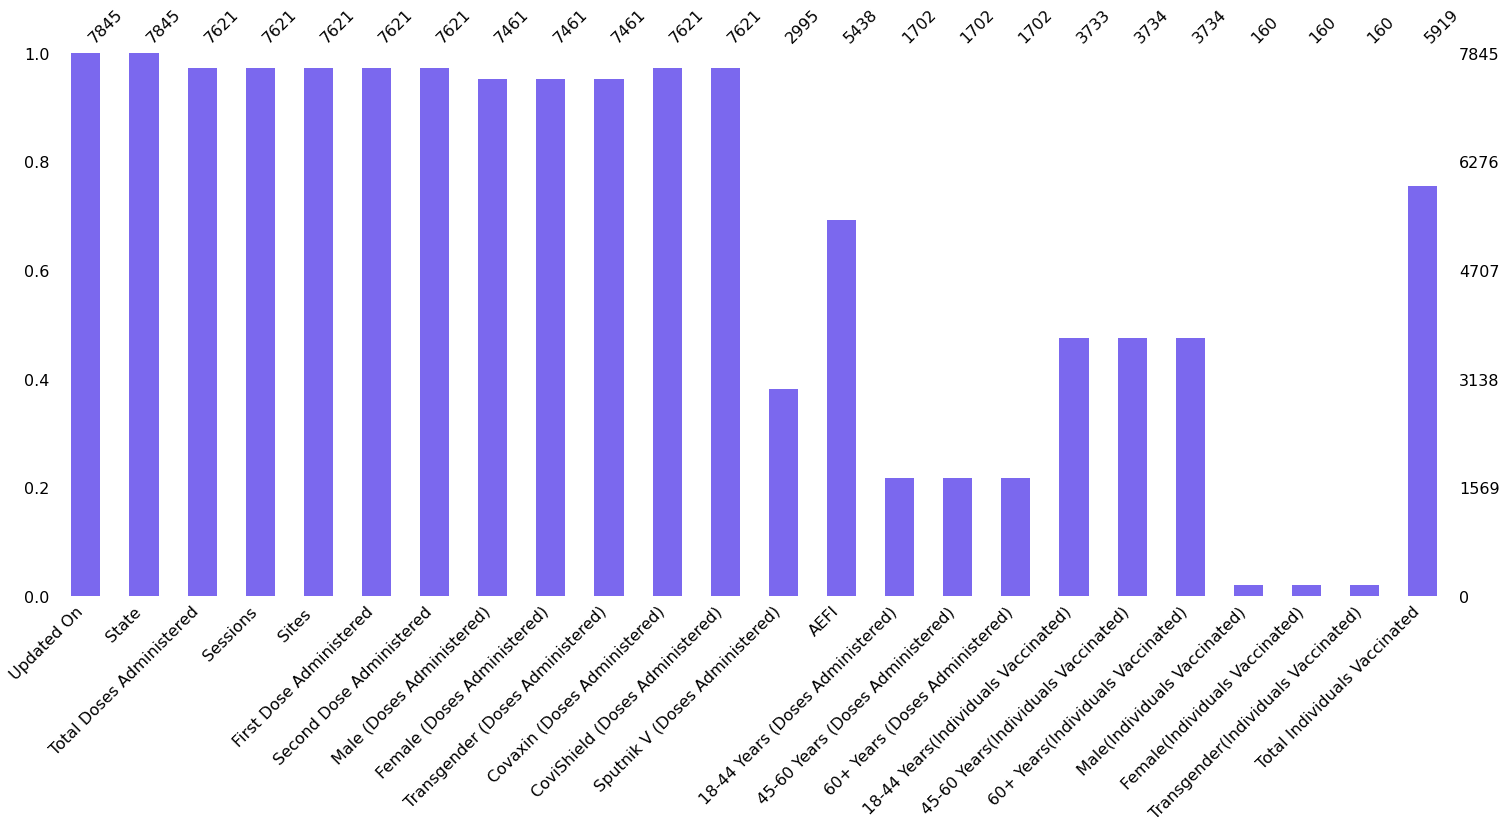

In [ ]:
msno.bar(states, color="mediumslateblue");

`matrix`

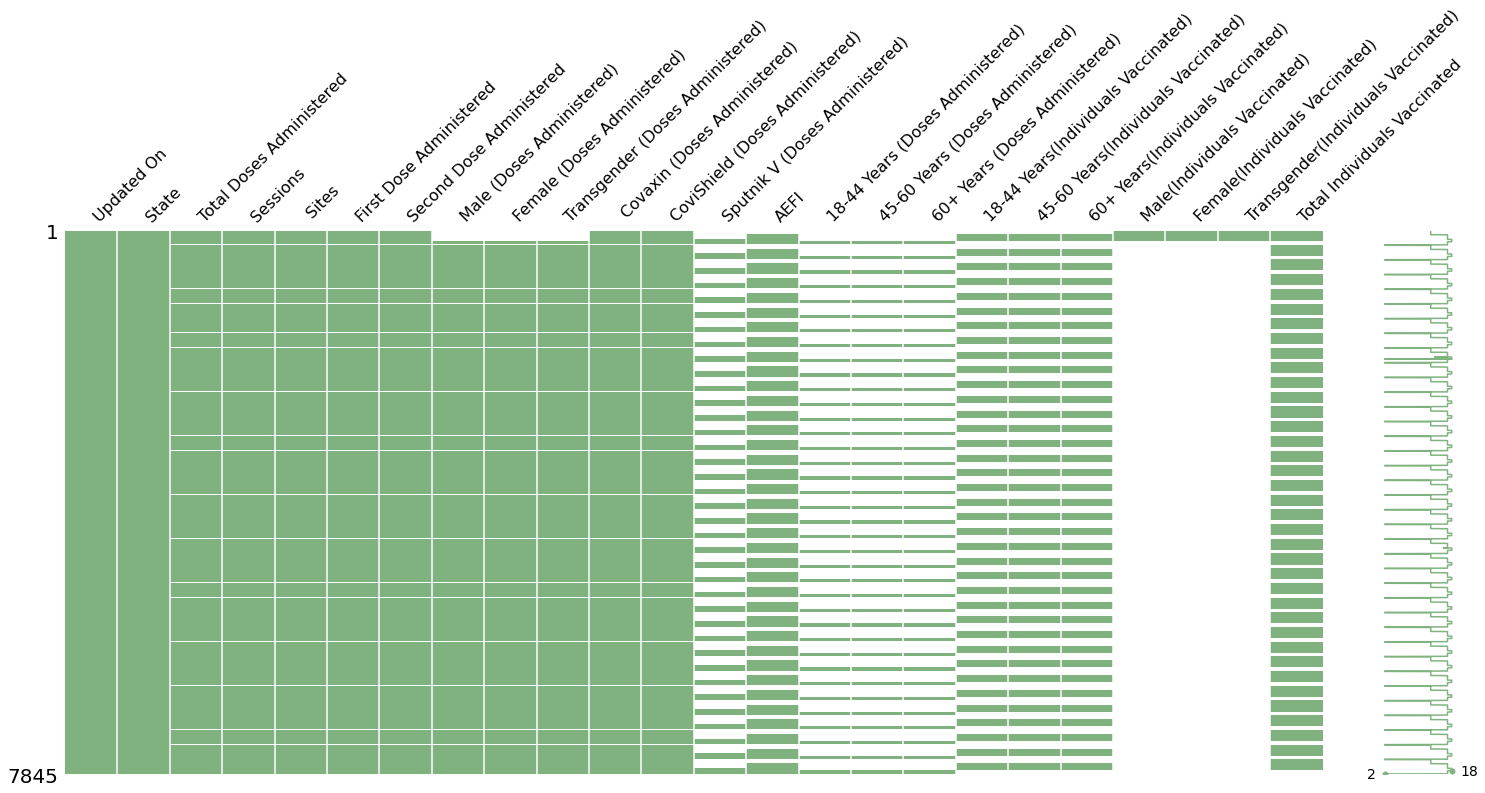

In [ ]:
msno.matrix(states, color=(.5, .7, .5));

`heatmap`

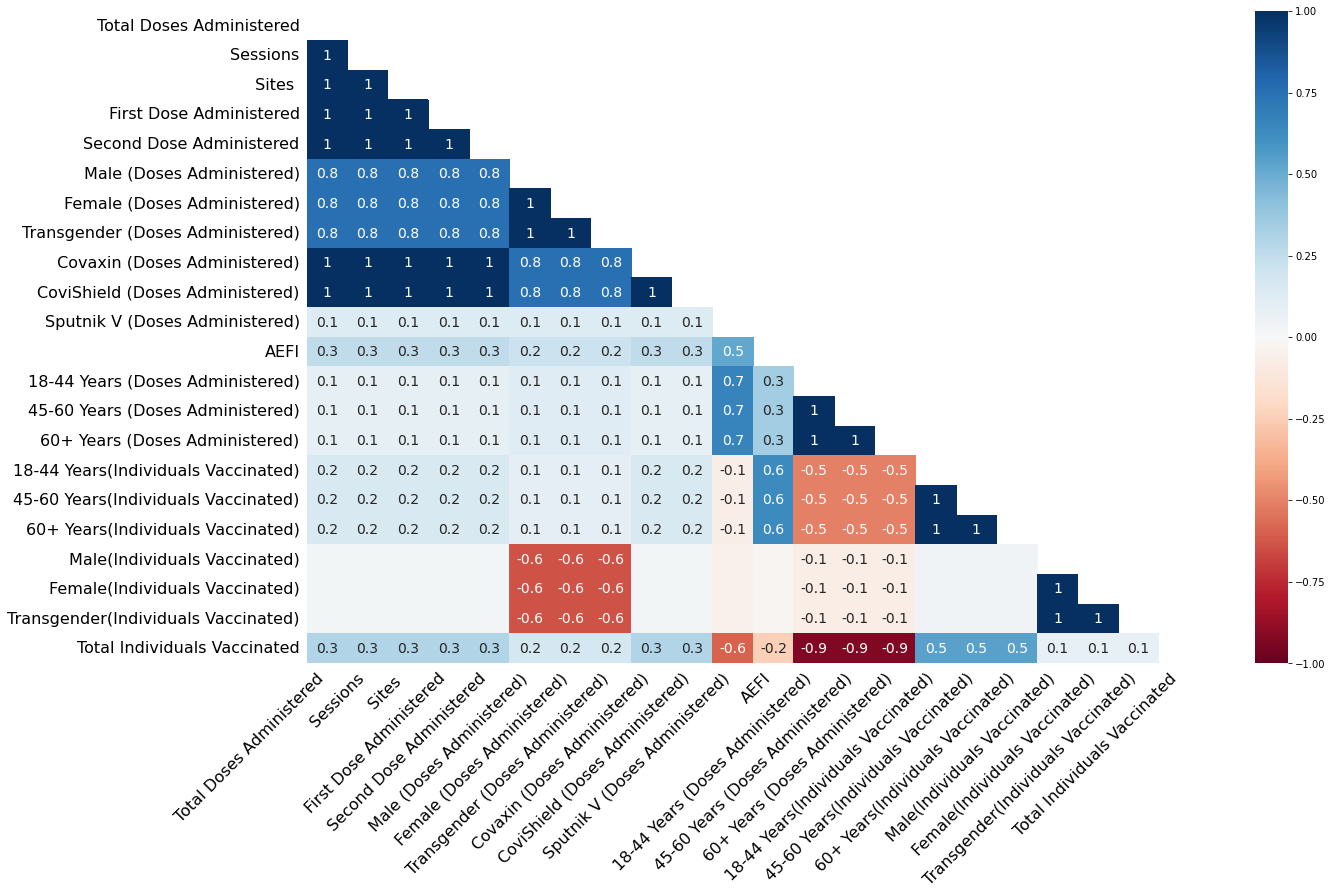

In [ ]:
msno.heatmap(states);

Столбцы, в которых сравнительно немного отсутствующих данных (30-35%), всегда хорошо заполнить. Ситуации могут быть следующие:

- один столбец порядковых данных разбит на несколько бинарных. Это хорошо проверить и в зависимости от ситуации сделать соответствующие преобразования: слить все в один столбец или дозаполнить нулями каждый из имеющихся.
- заполнить пропуски на основе имеющихся данных: средним, максимальным или медианой.
- ввести новую категорию для категориальных данных.
- предсказать значения в столбце на основе других данных (регрессией или случайным лесом, например).

Если отсутствующих данных больше, чем имеющихся, такой столбец иногда вообще не стоит использовать, т.к. он только ухудшит модель.

## Манипуляции с данными

#### Работа с типами данных

Помимо названий, можно отбирать столбцы по типам данных, методом `select_dtypes()`.

In [ ]:
covid.select_dtypes(include="int64").head()

,Sno,Cured,Deaths,Confirmed
0,1,0,0,1
1,2,0,0,1
2,3,0,0,2
3,4,0,0,3
4,5,0,0,3


In [ ]:
covid.select_dtypes(exclude=[int]).head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational
0,2020-01-30,6:00 PM,Kerala,1,0
1,2020-01-31,6:00 PM,Kerala,1,0
2,2020-02-01,6:00 PM,Kerala,2,0
3,2020-02-02,6:00 PM,Kerala,3,0
4,2020-02-03,6:00 PM,Kerala,3,0


In [ ]:
covid.ConfirmedIndianNational.unique()

array(['1', '2', '3', '0', '6', '7', '8', '9', '4', '15', '5', '17', '10',
       '11', '19', '14', '22', '32', '12', '23', '24', '36', '25', '39',
       '44', '18', '16', '26', '49', '33', '60', '13', '28', '45', '64',
       '21', '29', '71', '30', '37', '87', '86', '41', '101', '125', '34',
       '35', '42', '55', '110', '20', '121', '40', '129', '127', '38',
       '168', '177', '52', '46', '54', '-'], dtype=object)

Эти данные не мешало бы хорошо обработать, прежде чем приступать к извлечению полезной информации.

Можно проверить, пустой ли датафрейм.

In [ ]:
covid.empty

False

Можно несколькими способами проводить преобразование типов.

In [ ]:
#astype(dtype, copy=True, errors="raise")
covid.ConfirmedIndianNational.astype("category")

0        1
1        1
2        2
3        3
4        3
        ..
18105    -
18106    -
18107    -
18108    -
18109    -
Name: ConfirmedIndianNational, Length: 18110, dtype: category
Categories (62, object): ['-', '0', '1', '10', ..., '8', '86', '87', '9']

In [ ]:
#convert_dtypes()
covid.convert_dtypes()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


- `squeeze()` сжимает размерность объекта

In [ ]:
covid[["Date"]][:5]

,Date
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03


In [ ]:
covid["Date"][:5]

In [ ]:
covid[["Date"]][:5].squeeze()

0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
Name: Date, dtype: object

#### Обход датафрейма циклом

`items()`, `iteritems()`, `iterrows()`, `itertuples()` упрощают обход датафрейма циклом.

In [ ]:
df = covid.iloc[:10, 1:3]
df

,Date,Time
0,2020-01-30,6:00 PM
1,2020-01-31,6:00 PM
2,2020-02-01,6:00 PM
3,2020-02-02,6:00 PM
4,2020-02-03,6:00 PM
5,2020-02-04,6:00 PM
6,2020-02-05,6:00 PM
7,2020-02-06,6:00 PM
8,2020-02-07,6:00 PM
9,2020-02-08,6:00 PM


In [ ]:
#items()
for date, time in df.items():
  print(date)
  print(time)

Date
0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
5    2020-02-04
6    2020-02-05
7    2020-02-06
8    2020-02-07
9    2020-02-08
Name: Date, dtype: object
Time
0    6:00 PM
1    6:00 PM
2    6:00 PM
3    6:00 PM
4    6:00 PM
5    6:00 PM
6    6:00 PM
7    6:00 PM
8    6:00 PM
9    6:00 PM
Name: Time, dtype: object


In [ ]:
#iteritems()
for date, time in df.iteritems():
  print(date)
  print(time)

Date
0    2020-01-30
1    2020-01-31
2    2020-02-01
3    2020-02-02
4    2020-02-03
5    2020-02-04
6    2020-02-05
7    2020-02-06
8    2020-02-07
9    2020-02-08
Name: Date, dtype: object
Time
0    6:00 PM
1    6:00 PM
2    6:00 PM
3    6:00 PM
4    6:00 PM
5    6:00 PM
6    6:00 PM
7    6:00 PM
8    6:00 PM
9    6:00 PM
Name: Time, dtype: object


In [ ]:
#iterrows()
for date, time in df.iterrows():
  print(date)
  print(time)

0
Date    2020-01-30
Time       6:00 PM
Name: 0, dtype: object
1
Date    2020-01-31
Time       6:00 PM
Name: 1, dtype: object
2
Date    2020-02-01
Time       6:00 PM
Name: 2, dtype: object
3
Date    2020-02-02
Time       6:00 PM
Name: 3, dtype: object
4
Date    2020-02-03
Time       6:00 PM
Name: 4, dtype: object
5
Date    2020-02-04
Time       6:00 PM
Name: 5, dtype: object
6
Date    2020-02-05
Time       6:00 PM
Name: 6, dtype: object
7
Date    2020-02-06
Time       6:00 PM
Name: 7, dtype: object
8
Date    2020-02-07
Time       6:00 PM
Name: 8, dtype: object
9
Date    2020-02-08
Time       6:00 PM
Name: 9, dtype: object


In [ ]:
#itertuples()
for row in df.itertuples():
  print(row)

Pandas(Index=0, Date='2020-01-30', Time='6:00 PM')
Pandas(Index=1, Date='2020-01-31', Time='6:00 PM')
Pandas(Index=2, Date='2020-02-01', Time='6:00 PM')
Pandas(Index=3, Date='2020-02-02', Time='6:00 PM')
Pandas(Index=4, Date='2020-02-03', Time='6:00 PM')
Pandas(Index=5, Date='2020-02-04', Time='6:00 PM')
Pandas(Index=6, Date='2020-02-05', Time='6:00 PM')
Pandas(Index=7, Date='2020-02-06', Time='6:00 PM')
Pandas(Index=8, Date='2020-02-07', Time='6:00 PM')
Pandas(Index=9, Date='2020-02-08', Time='6:00 PM')


In [ ]:
for row in df.itertuples():
  print(row.Date, row.Time)

2020-01-30 6:00 PM
2020-01-31 6:00 PM
2020-02-01 6:00 PM
2020-02-02 6:00 PM
2020-02-03 6:00 PM
2020-02-04 6:00 PM
2020-02-05 6:00 PM
2020-02-06 6:00 PM
2020-02-07 6:00 PM
2020-02-08 6:00 PM


In [ ]:
for i in df.index.values: #i - значение индексов
for i in range(len(df)): #i - просто какое-то число

#### Еще одно удаление столбца

`pop()` удаляет столбец из датафрейма и возвращает его (как и всегда делает `pop`).

In [ ]:
dropped = df.pop("Time")
print(dropped)
df

0    6:00 PM
1    6:00 PM
2    6:00 PM
3    6:00 PM
4    6:00 PM
5    6:00 PM
6    6:00 PM
7    6:00 PM
8    6:00 PM
9    6:00 PM
Name: Time, dtype: object


,Date
0,2020-01-30
1,2020-01-31
2,2020-02-01
3,2020-02-02
4,2020-02-03
5,2020-02-04
6,2020-02-05
7,2020-02-06
8,2020-02-07
9,2020-02-08


#### Мультииндексы

Для начала из таблицы `states` создадим датафрейм с мультииндексами, сгруппировав информацию по регионам и датам.

In [ ]:
states_grouped = pd.DataFrame(states.set_index(["State", "Updated On"]))
states_grouped.head()

Total Doses Administered  ...  Total Individuals Vaccinated
State Updated On                            ...                              
India 16/01/2021                   48276.0  ...                       48276.0
      17/01/2021                   58604.0  ...                       58604.0
      18/01/2021                   99449.0  ...                       99449.0
      19/01/2021                  195525.0  ...                      195525.0
      20/01/2021                  251280.0  ...                      251280.0

[5 rows x 22 columns]

Методом `xs()` можно брать данные по одному или нескольким внешним индексам.

In [ ]:
states_grouped.xs(key="Goa")

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
Updated On,,,,,,,,,,,,,,,,,,,,,,
16/01/2021,50.0,7.0,7.0,50.0,0.0,16.0,34.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
17/01/2021,50.0,10.0,7.0,50.0,0.0,16.0,34.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
18/01/2021,47.0,20.0,8.0,47.0,0.0,20.0,27.0,0.0,0.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0
19/01/2021,72.0,32.0,15.0,72.0,0.0,26.0,46.0,0.0,0.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
20/01/2021,72.0,38.0,20.0,72.0,0.0,26.0,46.0,0.0,0.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/08/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/08/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/08/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
states_grouped.xs(key=("Goa", "18/01/2021"))

Total Doses Administered               47.0
Sessions                               20.0
 Sites                                  8.0
First Dose Administered                47.0
Second Dose Administered                0.0
Male (Doses Administered)              20.0
Female (Doses Administered)            27.0
Transgender (Doses Administered)        0.0
 Covaxin (Doses Administered)           0.0
CoviShield (Doses Administered)        47.0
Sputnik V (Doses Administered)          NaN
AEFI                                    NaN
18-44 Years (Doses Administered)        NaN
45-60 Years (Doses Administered)        NaN
60+ Years (Doses Administered)          NaN
18-44 Years(Individuals Vaccinated)     NaN
45-60 Years(Individuals Vaccinated)     NaN
60+ Years(Individuals Vaccinated)       NaN
Male(Individuals Vaccinated)            NaN
Female(Individuals Vaccinated)          NaN
Transgender(Individuals Vaccinated)     NaN
Total Individuals Vaccinated           47.0
Name: (Goa, 18/01/2021), dtype: 

- `droplevel()` удаляет уровень вложенности

In [ ]:
states_grouped.droplevel("Updated On")

,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
State,,,,,,,,,,,,,,,,,,,,,,
India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- `swaplevel()` меняет уровни местами

In [ ]:
states_grouped.swaplevel()

,,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
Updated On,State,,,,,,,,,,,,,,,,,,,,,,
16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- `pivot()` и `pivot_table()` создают сводные таблицы по индексу или столбцу

In [ ]:
pd.pivot_table(covid, values="Cured", columns=["State/UnionTerritory"], aggfunc="mean").T[:10]

,Cured
State/UnionTerritory,
Andaman and Nicobar Islands,3667.234127
Andhra Pradesh,715109.131274
Arunachal Pradesh,13282.558468
Assam,186101.767068
Bihar,247278.462451
Bihar****,701234.000000
Cases being reassigned to states,0.000000
Chandigarh,19798.502935
Chhattisgarh,296691.514677


- `crosstab()` создает сводные таблицы по категориям

In [ ]:
a = np.array(["foo", "foo", "foo", "foo", "bar", "bar",
              "bar", "bar", "foo", "foo", "foo"], dtype=object)
b = np.array(["one", "one", "one", "two", "one", "one",
              "one", "two", "two", "two", "one"], dtype=object)
c = np.array(["dull", "dull", "shiny", "dull", "dull", "shiny",
              "shiny", "dull", "shiny", "shiny", "shiny"],
             dtype=object)

pd.crosstab(a, [b, c], rownames=['a'], colnames=['b', 'c'])

b    one        two      
c   dull shiny dull shiny
a                        
bar    1     2    1     0
foo    2     2    1     2

#### Замена значений

- `where()` и `mask()`

Заменить одно значение на другое по условию можно с помощью `where()`. 
>Будьте внимательны, по умолчанию заменой становится `NaN`.

In [ ]:
df = covid.sample(10)[["Date", "Time", "State/UnionTerritory", "Cured", "Deaths"]]
df

,Date,Time,State/UnionTerritory,Cured,Deaths
8292,2020-11-11,8:00 AM,Kerala,415158,1742
10169,2021-01-03,8:00 AM,Karnataka,898176,12099
11526,2021-02-10,8:00 AM,Bihar,259074,1518
14629,2021-05-07,8:00 AM,Haryana,452836,5137
7320,2020-10-14,8:00 AM,Odisha,232988,1057
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248
4450,2020-07-24,8:00 AM,Odisha,14393,114
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4
1635,2020-05-05,5:00 PM,Uttarakhand,39,1


In [ ]:
df.Date.where(df.Date > "2021-04-30")

8292            NaN
10169           NaN
11526           NaN
14629    2021-05-07
7320            NaN
4987            NaN
7203            NaN
4450            NaN
15669    2021-06-05
1635            NaN
Name: Date, dtype: object

Остались только значения, удоалвтворяющие условию.

In [ ]:
df.Date.where(df.Date > "2021-04-30", "irrelevant")

8292     irrelevant
10169    irrelevant
11526    irrelevant
14629    2021-05-07
7320     irrelevant
4987     irrelevant
7203     irrelevant
4450     irrelevant
15669    2021-06-05
1635     irrelevant
Name: Date, dtype: object

В условие может быть записано все, что удовлетворяет правилам составления условий на `Python`.

Обратный метод для `where` - `mask`. Он делает замену, если условие выполнено.

In [ ]:
df.Date.mask(df.Date > "2021-04-30", "irrelevant")

8292     2020-11-11
10169    2021-01-03
11526    2021-02-10
14629    irrelevant
7320     2020-10-14
4987     2020-08-09
7203     2020-10-11
4450     2020-07-24
15669    irrelevant
1635     2020-05-05
Name: Date, dtype: object

- `clip()` проверяет, попадает ли значение столбца в указанный диапазон, и если нет - заменяет его на пороговое значение

In [ ]:
df.Cured.clip(100, 300000)

8292     300000
10169    300000
11526    259074
14629    300000
7320     232988
4987     129615
7203      14278
4450      14393
15669     10261
1635        100
Name: Cured, dtype: int64

- `add_prefix()` и `add_suffix()` добавляют что-то в начало или конец названия столбца соответственно

In [ ]:
df1 = df.add_prefix("col_")
df1

,col_Date,col_Time,col_State/UnionTerritory,col_Cured,col_Deaths
4926,2020-08-07,8:00 AM,Gujarat,50350,2583
2937,2020-06-12,8:00 AM,Madhya Pradesh,7042,431
9228,2020-12-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,3328,2
8347,2020-11-13,8:00 AM,Andhra Pradesh,822011,6837
9628,2020-12-19,8:00 AM,Jharkhand,109891,1008
7168,2020-10-10,8:00 AM,Himachal Pradesh,13876,245
3706,2020-07-03,8:00 AM,Tripura,1146,1
8893,2020-11-28,8:00 AM,Mizoram,3367,5
16607,2021-07-01,8:00 AM,Goa,161361,3054
1826,2020-05-11,8:00 AM,Odisha,68,3


- `explode()` распаковывет списки в ячейках в строки датафрейма

In [ ]:
df_t = pd.DataFrame({'A': [[0, 1, 2], 'foo', 3, [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], 0, 9, ['d', 'e']]})
df_t

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,0
2,3,1,9
3,"[3, 4]",1,"[d, e]"


In [ ]:
df_t.explode('A')

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,0
2,3,1,9
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [ ]:
!pip install pandas==1.3.0

     |████████████████████████████████| 10.8 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.0 which is incompatible.


In [ ]:
df_t.explode(column=["A", "C"])

,A,B,C
0,0,1,a
0,1,1,b
0,2,1,c
1,foo,1,0
2,3,1,9
3,3,1,d
3,4,1,e


- `truncate()` вырезает часть таблицы по индексам

In [ ]:
df.sort_index(inplace=True)
df

,Date,Time,State,Cured,Deaths,Min Cured,Datetime
1826,2020-05-11,8:00 AM,Odisha,68,3,68,2020-05-11 08:00:00
2937,2020-06-12,8:00 AM,Madhya Pradesh,7042,431,7042,2020-06-12 08:00:00
3706,2020-07-03,8:00 AM,Tripura,1146,1,1146,2020-07-03 08:00:00
4926,2020-08-07,8:00 AM,Gujarat,50350,2583,50350,2020-08-07 08:00:00
7168,2020-10-10,8:00 AM,Himachal Pradesh,13876,245,13876,2020-10-10 08:00:00
8347,2020-11-13,8:00 AM,Andhra Pradesh,822011,6837,822011,2020-11-13 08:00:00
8893,2020-11-28,8:00 AM,Mizoram,3367,5,3367,2020-11-28 08:00:00
9228,2020-12-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,3328,2,3328,2020-12-08 08:00:00
9628,2020-12-19,8:00 AM,Jharkhand,109891,1008,109891,2020-12-19 08:00:00
16607,2021-07-01,8:00 AM,Goa,161361,3054,161361,2021-07-01 08:00:00


In [ ]:
df.truncate(before=4926, after=9228)

,Date,Time,State,Cured,Deaths,Min Cured,Datetime
4926,2020-08-07,8:00 AM,Gujarat,50350,2583,50350,2020-08-07 08:00:00
7168,2020-10-10,8:00 AM,Himachal Pradesh,13876,245,13876,2020-10-10 08:00:00
8347,2020-11-13,8:00 AM,Andhra Pradesh,822011,6837,822011,2020-11-13 08:00:00
8893,2020-11-28,8:00 AM,Mizoram,3367,5,3367,2020-11-28 08:00:00
9228,2020-12-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,3328,2,3328,2020-12-08 08:00:00


#### Логические операции

Для операторов `==, !=, <=, <, >=, >` в `Pandas` есть свой набор эквивалентных методов.

Оператор | Pandas
--- | ---
`==` | `eq()`
`!=` | `ne()`
`<=` | `le()`
`<` | `lt()`
`>=` | `ge()`
`>` | `gt()`


Посмотрим на примере.

In [ ]:
df.Cured == df.Deaths

8292     False
10169    False
11526    False
14629    False
7320     False
4987     False
7203     False
4450     False
15669    False
1635     False
dtype: bool

In [ ]:
df.Cured.eq(df.Deaths)

8292     False
10169    False
11526    False
14629    False
7320     False
4987     False
7203     False
4450     False
15669    False
1635     False
dtype: bool

In [ ]:
df.Cured > df.Deaths

8292     True
10169    True
11526    True
14629    True
7320     True
4987     True
7203     True
4450     True
15669    True
1635     True
dtype: bool

In [ ]:
df.Cured.gt(df.Deaths)

8292     True
10169    True
11526    True
14629    True
7320     True
4987     True
7203     True
4450     True
15669    True
1635     True
dtype: bool

#### Объединение таблиц

В пандасе много методов и функций для объединения таблиц.

- `combine` объединяет две таблицы по правилу

In [ ]:
#простой пример из документации
df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
take_smaller = lambda s1, s2: s1 if s1.sum() < s2.sum() else s2
df1.combine(df2, take_smaller)

,A,B
0,1,3
1,1,3


In [ ]:
import numpy as np
df1 = pd.DataFrame({'A': [5, 0], 'B': [2, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine(df2, np.minimum)

,A,B
0,1,2
1,0,3


Удобно использовать, например, когда в двух равных по размерности и значениям таблицах данные по столбцу отсутствуют в разных ячейках. Так можно аккуратно их дозаполнить.

- `combine_first` делает ровно то, что описано в примере выше. При этом пустые значения не заменяются, если присутствуют в соответствующих ячейках обеих таблиц

In [ ]:
df1 = pd.DataFrame({'A': [None, 0], 'B': [None, 4]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1.combine_first(df2)

,A,B
0,1.0,3.0
1,0.0,4.0


- `append()` добавляет одну строку или таблицу в конец другой

In [ ]:
#для начала разделим
df1, df2 = df.iloc[:3, :], df.iloc[3:, :]
df1

,Date,Time,State/UnionTerritory,Cured,Deaths
8292,2020-11-11,8:00 AM,Kerala,415158,1742
10169,2021-01-03,8:00 AM,Karnataka,898176,12099
11526,2021-02-10,8:00 AM,Bihar,259074,1518


In [ ]:
df2

,Date,Time,State/UnionTerritory,Cured,Deaths
14629,2021-05-07,8:00 AM,Haryana,452836,5137
7320,2020-10-14,8:00 AM,Odisha,232988,1057
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248
4450,2020-07-24,8:00 AM,Odisha,14393,114
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4
1635,2020-05-05,5:00 PM,Uttarakhand,39,1


In [ ]:
df3 = df2.append(df1, ignore_index=True)
df3

,Date,Time,State/UnionTerritory,Cured,Deaths
0,2021-05-07,8:00 AM,Haryana,452836,5137
1,2020-10-14,8:00 AM,Odisha,232988,1057
2,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939
3,2020-10-11,8:00 AM,Himachal Pradesh,14278,248
4,2020-07-24,8:00 AM,Odisha,14393,114
5,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4
6,2020-05-05,5:00 PM,Uttarakhand,39,1
7,2020-11-11,8:00 AM,Kerala,415158,1742
8,2021-01-03,8:00 AM,Karnataka,898176,12099
9,2021-02-10,8:00 AM,Bihar,259074,1518


- `compare()` сравнивает две таблицы и выводит разницу

In [ ]:
df_copy = df.reset_index(drop=True)
df_copy.compare(df3)

Date                 Time           ...   Cured         Deaths       
         self       other     self    other  ...    self   other   self  other
0  2020-11-11  2021-05-07      NaN      NaN  ...  415158  452836   1742   5137
1  2021-01-03  2020-10-14      NaN      NaN  ...  898176  232988  12099   1057
2  2021-02-10  2020-08-09      NaN      NaN  ...  259074  129615   1518   1939
3  2021-05-07  2020-10-11      NaN      NaN  ...  452836   14278   5137    248
4  2020-10-14  2020-07-24      NaN      NaN  ...  232988   14393   1057    114
5  2020-08-09  2021-06-05      NaN      NaN  ...  129615   10261   1939      4
6  2020-10-11  2020-05-05  8:00 AM  5:00 PM  ...   14278      39    248      1
7  2020-07-24  2020-11-11      NaN      NaN  ...   14393  415158    114   1742
8  2021-06-05  2021-01-03      NaN      NaN  ...   10261  898176      4  12099
9  2020-05-05  2021-02-10  5:00 PM  8:00 AM  ...      39  259074      1   1518

[10 rows x 10 columns]

`NaN` в табличке означает, что значения в ячейках одинаковые.

- `join()` объединяет две таблицы по одному или нескольким столбцам.

In [ ]:
df_t = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})
df_t.set_index('key').join(other.set_index('key'))

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [ ]:
df_t.join(other.set_index('key'), on='key')

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,NaN
4,K4,A4,NaN
5,K5,A5,NaN


Объединяемые татблицы должны совпадать по количеству строк, столбцов и значениям хотя бы одного из столбцов.

- `merge()` как `join()`, но не требует совпадения размерности.

In [ ]:
df = df.rename(columns={"State/UnionTerritory": "State"})
df

,Date,Time,State,Cured,Deaths
8292,2020-11-11,8:00 AM,Kerala,415158,1742
10169,2021-01-03,8:00 AM,Karnataka,898176,12099
11526,2021-02-10,8:00 AM,Bihar,259074,1518
14629,2021-05-07,8:00 AM,Haryana,452836,5137
7320,2020-10-14,8:00 AM,Odisha,232988,1057
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248
4450,2020-07-24,8:00 AM,Odisha,14393,114
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4
1635,2020-05-05,5:00 PM,Uttarakhand,39,1


In [ ]:
df4 = df.merge(details, on=["Date", "State"], how="inner") #inner дает пересечение таблиц
df4

,Date,Time,State,Cured,Deaths,TotalSamples,Negative,Positive
0,2020-11-11,8:00 AM,Kerala,415158,1742,5249865.0,NaN,502721.0
1,2021-01-03,8:00 AM,Karnataka,898176,12099,14432085.0,NaN,NaN
2,2021-02-10,8:00 AM,Bihar,259074,1518,21741730.0,NaN,NaN
3,2021-05-07,8:00 AM,Haryana,452836,5137,7758576.0,NaN,NaN
4,2020-10-14,8:00 AM,Odisha,232988,1057,3878992.0,NaN,NaN
5,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,2487305.0,2259445,227860.0
6,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,324507.0,306967,NaN
7,2020-07-24,8:00 AM,Odisha,14393,114,433578.0,NaN,22693.0
8,2020-05-05,5:00 PM,Uttarakhand,39,1,8060.0,7357,61.0


#### Применение функций

Помимо `apply`, `map` и `applymap` есть еще ряд методов, допускающих обработку значений по функциям.

- `agg()` и `aggregate()` принимают на вход одну или несколько функций, которые можно применять к разным столбцам. Функции могут быть встроенные, сторонние, лямбды. Делают ровно одно и то же, документация рекомендует использовать `agg()`

In [ ]:
df

,Date,Time,State,Cured,Deaths
8292,2020-11-11,8:00 AM,Kerala,415158,1742
10169,2021-01-03,8:00 AM,Karnataka,898176,12099
11526,2021-02-10,8:00 AM,Bihar,259074,1518
14629,2021-05-07,8:00 AM,Haryana,452836,5137
7320,2020-10-14,8:00 AM,Odisha,232988,1057
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248
4450,2020-07-24,8:00 AM,Odisha,14393,114
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4
1635,2020-05-05,5:00 PM,Uttarakhand,39,1


In [ ]:
df.Date.max()

'2021-06-05'

In [ ]:
df.Date.agg(max)

'2021-06-05'

In [ ]:
df.Date.agg([max, min])

max    2021-06-05
min    2020-05-05
Name: Date, dtype: object

In [ ]:
df.agg({"Date": [max, min], "Cured": [max, np.median], "Deaths": [min, np.median]})

,Date,Cured,Deaths
max,2021-06-05,898176.0,NaN
min,2020-05-05,NaN,1.0
median,NaN,181301.5,1287.5


- `pipe()` рекомендуется применять, когда нужно записать несколько применяемых подряд функций

In [ ]:
df.Cured.pipe(lambda x: x / df.Cured.max()).pipe(np.median)

0.012723674014094702

- `transform()` удобно применять, когда нужно что-то сделать со сгруппированными данными. В базовых случаях работает почти как `apply()`, не поддерживает аггрегирование

In [ ]:
df.Cured.transform(lambda x: x / df.shape[0])

4926      5035.0
2937       704.2
9228       332.8
8347     82201.1
9628     10989.1
7168      1387.6
3706       114.6
8893       336.7
16607    16136.1
1826         6.8
Name: Cured, dtype: float64

In [ ]:
df["Min Cured"] = df.groupby(by="State")["Cured"].transform(min)
df["Max Cured"] = df.groupby(by="State")["Cured"].transform(max)
df["First Value Cured"] = df.groupby(by="State")["Cured"].transform("first")
df

,Date,Time,State,Cured,Deaths,Min Cured,Max Cured,First Value Cured
8292,2020-11-11,8:00 AM,Kerala,415158,1742,415158,415158,415158
10169,2021-01-03,8:00 AM,Karnataka,898176,12099,898176,898176,898176
11526,2021-02-10,8:00 AM,Bihar,259074,1518,259074,259074,259074
14629,2021-05-07,8:00 AM,Haryana,452836,5137,452836,452836,452836
7320,2020-10-14,8:00 AM,Odisha,232988,1057,14393,232988,232988
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615,129615,129615
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278,14278,14278
4450,2020-07-24,8:00 AM,Odisha,14393,114,14393,232988,232988
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261,10261,10261
1635,2020-05-05,5:00 PM,Uttarakhand,39,1,39,39,39


- `eval()` - создает столбец значений на основе операций с другими столбцами, операции над данными арифметические

In [ ]:
#inplace=True превращает метод в метод "на месте"
df.eval("Dead_to_Cured = Deaths / Cured", inplace=True)
df

,Date,Time,State,Cured,Deaths,Min Cured,Max Cured,First Value Cured,Dead_to_Cured
4926,2020-08-07,8:00 AM,Gujarat,50350,2583,50350,50350,50350,0.051301
2937,2020-06-12,8:00 AM,Madhya Pradesh,7042,431,7042,7042,7042,0.061204
9228,2020-12-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,3328,2,3328,3328,3328,0.000601
8347,2020-11-13,8:00 AM,Andhra Pradesh,822011,6837,822011,822011,822011,0.008317
9628,2020-12-19,8:00 AM,Jharkhand,109891,1008,109891,109891,109891,0.009173
7168,2020-10-10,8:00 AM,Himachal Pradesh,13876,245,13876,13876,13876,0.017656
3706,2020-07-03,8:00 AM,Tripura,1146,1,1146,1146,1146,0.000873
8893,2020-11-28,8:00 AM,Mizoram,3367,5,3367,3367,3367,0.001485
16607,2021-07-01,8:00 AM,Goa,161361,3054,161361,161361,161361,0.018927
1826,2020-05-11,8:00 AM,Odisha,68,3,68,68,68,0.044118


- `assign()` добавляет один или несколько новых столбцов, заданных функцией

In [ ]:
df3 = df.assign(new1=lambda x: x.Cured > x.Cured.mean(), new2=lambda x: x.Cured < x.Cured.median())
df3

,Date,Time,State,Cured,Deaths,Min Cured,Max Cured,First Value Cured,Dead_to_Cured,new1,new2
4926,2020-08-07,8:00 AM,Gujarat,50350,2583,50350,50350,50350,0.051301,False,False
2937,2020-06-12,8:00 AM,Madhya Pradesh,7042,431,7042,7042,7042,0.061204,False,True
9228,2020-12-08,8:00 AM,Dadra and Nagar Haveli and Daman and Diu,3328,2,3328,3328,3328,0.000601,False,True
8347,2020-11-13,8:00 AM,Andhra Pradesh,822011,6837,822011,822011,822011,0.008317,True,False
9628,2020-12-19,8:00 AM,Jharkhand,109891,1008,109891,109891,109891,0.009173,False,False
7168,2020-10-10,8:00 AM,Himachal Pradesh,13876,245,13876,13876,13876,0.017656,False,False
3706,2020-07-03,8:00 AM,Tripura,1146,1,1146,1146,1146,0.000873,False,True
8893,2020-11-28,8:00 AM,Mizoram,3367,5,3367,3367,3367,0.001485,False,True
16607,2021-07-01,8:00 AM,Goa,161361,3054,161361,161361,161361,0.018927,True,False
1826,2020-05-11,8:00 AM,Odisha,68,3,68,68,68,0.044118,False,True


#### Куммулятивные операции

- `cummax()` - куммулятивный (текущий) максимум

In [ ]:
df = df.iloc[:, :6]
df

,Date,Time,State,Cured,Deaths,Min Cured
8292,2020-11-11,8:00 AM,Kerala,415158,1742,415158
10169,2021-01-03,8:00 AM,Karnataka,898176,12099,898176
11526,2021-02-10,8:00 AM,Bihar,259074,1518,259074
14629,2021-05-07,8:00 AM,Haryana,452836,5137,452836
7320,2020-10-14,8:00 AM,Odisha,232988,1057,14393
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278
4450,2020-07-24,8:00 AM,Odisha,14393,114,14393
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261
1635,2020-05-05,5:00 PM,Uttarakhand,39,1,39


In [ ]:
df.Cured.cummax()

8292     415158
10169    898176
11526    898176
14629    898176
7320     898176
4987     898176
7203     898176
4450     898176
15669    898176
1635     898176
Name: Cured, dtype: int64

- `cummin()` - куммулятивный (текущий) минимум

In [ ]:
df.Cured.cummin()

8292     415158
10169    415158
11526    259074
14629    259074
7320     232988
4987     129615
7203      14278
4450      14278
15669     10261
1635         39
Name: Cured, dtype: int64

- `cumsum()` - куммулятивная (накапливающаяся) сумма

In [ ]:
df.Cured.cumsum()

8292      415158
10169    1313334
11526    1572408
14629    2025244
7320     2258232
4987     2387847
7203     2402125
4450     2416518
15669    2426779
1635     2426818
Name: Cured, dtype: int64

- `cumprod()` - куммулятивное (накапливающееся) произведение

In [ ]:
df.Cured.cumprod()

8292                  415158
10169           372884951808
11526      96604796004705792
14629    8899204821605144576
7320    -6100908814177165312
4987     5729002207776759808
7203     5830299808424673280
4450     1266351351572217856
15669    7523390591003082752
1635    -1735672130232598528
Name: Cured, dtype: int64

#### Статистические методы

Экстремальные значения, средние, дисперсию и стандартное отклонение, а также корреляции и ковариации мы посмотрели в предыдущем колабе. Но это не все.

- `kurt()` и `kurtosis()` - коэффициент эксцесса (мера остроты пика распределения случайной величины)

> $\gamma_4 = \frac{\mu_4}{\sigma^4} - 3$, где $\mu_4$ - четвертый центральный момент, $\sigma^4$ - стандартное отклонение случайной величины $X$, а $-3$ вводится для того, чтобы коэффициент эксцесса стандартного нормального распределения был равен нулю. Он положителен, если пик распределения около математического ожидания острый, и отрицателен, если пик очень гладкий.

In [ ]:
df.Cured.kurt()

8.715901347756667

- `mad()` - абсолютное отклонение (абсолютная разница между элементом и выбранной точкой, от которой отсчитывается отклонение)

In [ ]:
df.Cured.mad()

149776.8

- `pct_change()` рассчитывает процентное изменение значения относительно предыдущего в столбце

In [ ]:
df.Cured.pct_change(periods=2) #periods говорит, что значения берутся с периодичностью 2

8292          NaN
10169         NaN
11526   -0.375963
14629   -0.495827
7320    -0.100689
4987    -0.713771
7203    -0.938718
4450    -0.888956
15669   -0.281342
1635    -0.997290
Name: Cured, dtype: float64

Еще можно задачать частоту расчета относительно даты, если она присутствует.

- `quantile()` возвращает значения указанной квантили

In [ ]:
df.Cured.quantile(.3)

3355.3

- `skew()` - коэффициент асимметрии (величина, характеризующая асимметрию распределения данной случайной величины)

> $A_S = \frac{\mu_3}{\sigma^3}$, где $\mu_3$ - третий центральный момент, $\sigma^3$ - стандартное отклонение случайной величины $X$. 

Коэффициент асимметрии положителен, если правый хвост распределения длиннее левого, и отрицателен в противном случае. Если распределение симметрично относительно математического ожидания, то его коэффициент асимметрии равен нулю.

In [ ]:
df.Cured.skew()

2.903602196762688

#### Время

In [ ]:
df

,Date,Time,State,Cured,Deaths,Min Cured
8292,2020-11-11,8:00 AM,Kerala,415158,1742,415158
10169,2021-01-03,8:00 AM,Karnataka,898176,12099,898176
11526,2021-02-10,8:00 AM,Bihar,259074,1518,259074
14629,2021-05-07,8:00 AM,Haryana,452836,5137,452836
7320,2020-10-14,8:00 AM,Odisha,232988,1057,14393
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278
4450,2020-07-24,8:00 AM,Odisha,14393,114,14393
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261
1635,2020-05-05,5:00 PM,Uttarakhand,39,1,39


- `to_datetime()` преобразует данные в формат `Timestamp`



In [ ]:
df["Datetime"] = pd.to_datetime(df.Date + " " + df.Time)
df

,Date,Time,State,Cured,Deaths,Min Cured,Datetime
8292,2020-11-11,8:00 AM,Kerala,415158,1742,415158,2020-11-11 08:00:00
10169,2021-01-03,8:00 AM,Karnataka,898176,12099,898176,2021-01-03 08:00:00
11526,2021-02-10,8:00 AM,Bihar,259074,1518,259074,2021-02-10 08:00:00
14629,2021-05-07,8:00 AM,Haryana,452836,5137,452836,2021-05-07 08:00:00
7320,2020-10-14,8:00 AM,Odisha,232988,1057,14393,2020-10-14 08:00:00
4987,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615,2020-08-09 08:00:00
7203,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278,2020-10-11 08:00:00
4450,2020-07-24,8:00 AM,Odisha,14393,114,14393,2020-07-24 08:00:00
15669,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261,2021-06-05 08:00:00
1635,2020-05-05,5:00 PM,Uttarakhand,39,1,39,2020-05-05 17:00:00


In [ ]:
df.Datetime.iloc[0]

Timestamp('2020-11-11 08:00:00')

Чтобы работать с форматом `Timestamp` и делать выборки по датам, надо дату сделать индексом.

In [ ]:
df1 = df.set_index(keys="Datetime")
df1

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2020-11-11 08:00:00,2020-11-11,8:00 AM,Kerala,415158,1742,415158
2021-01-03 08:00:00,2021-01-03,8:00 AM,Karnataka,898176,12099,898176
2021-02-10 08:00:00,2021-02-10,8:00 AM,Bihar,259074,1518,259074
2021-05-07 08:00:00,2021-05-07,8:00 AM,Haryana,452836,5137,452836
2020-10-14 08:00:00,2020-10-14,8:00 AM,Odisha,232988,1057,14393
2020-08-09 08:00:00,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615
2020-10-11 08:00:00,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278
2020-07-24 08:00:00,2020-07-24,8:00 AM,Odisha,14393,114,14393
2021-06-05 08:00:00,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261


- `asfreq()` добавляет и преобразует даты на основе указанной частоты

In [ ]:
df1.asfreq(freq='15D')

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2020-05-05 17:00:00,2020-05-05,5:00 PM,Uttarakhand,39.0,1.0,39.0
2020-05-20 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-04 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-19 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-04 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-19 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-18 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN


- `shift()` сдвигает строки по времени

In [ ]:
df1.shift(periods=3, fill_value=0, freq="3D")

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2020-11-20 08:00:00,2020-11-11,8:00 AM,Kerala,415158,1742,415158
2021-01-12 08:00:00,2021-01-03,8:00 AM,Karnataka,898176,12099,898176
2021-02-19 08:00:00,2021-02-10,8:00 AM,Bihar,259074,1518,259074
2021-05-16 08:00:00,2021-05-07,8:00 AM,Haryana,452836,5137,452836
2020-10-23 08:00:00,2020-10-14,8:00 AM,Odisha,232988,1057,14393
2020-08-18 08:00:00,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615
2020-10-20 08:00:00,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278
2020-08-02 08:00:00,2020-07-24,8:00 AM,Odisha,14393,114,14393
2021-06-14 08:00:00,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261


- `resample()` перегруппировывает данные по времени с заданным промежутком. Данные в остальных столбцах суммируются

In [ ]:
df1.resample("30D").sum()

,Cured,Deaths,Min Cured
Datetime,,,
2020-05-05,39,1,39
2020-06-04,0,0,0
2020-07-04,14393,114,14393
2020-08-03,129615,1939,129615
2020-09-02,0,0,0
2020-10-02,247266,1305,28671
2020-11-01,415158,1742,415158
2020-12-01,0,0,0
2020-12-31,898176,12099,898176


- `at_time()` выводит строки в конкретно заданное время

In [ ]:
df1.at_time("8:00")

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2020-11-11 08:00:00,2020-11-11,8:00 AM,Kerala,415158,1742,415158
2021-01-03 08:00:00,2021-01-03,8:00 AM,Karnataka,898176,12099,898176
2021-02-10 08:00:00,2021-02-10,8:00 AM,Bihar,259074,1518,259074
2021-05-07 08:00:00,2021-05-07,8:00 AM,Haryana,452836,5137,452836
2020-10-14 08:00:00,2020-10-14,8:00 AM,Odisha,232988,1057,14393
2020-08-09 08:00:00,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615
2020-10-11 08:00:00,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278
2020-07-24 08:00:00,2020-07-24,8:00 AM,Odisha,14393,114,14393
2021-06-05 08:00:00,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261


In [ ]:
df1.sort_index(inplace=True)
df1

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2020-05-05 17:00:00,2020-05-05,5:00 PM,Uttarakhand,39,1,39
2020-07-24 08:00:00,2020-07-24,8:00 AM,Odisha,14393,114,14393
2020-08-09 08:00:00,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615
2020-10-11 08:00:00,2020-10-11,8:00 AM,Himachal Pradesh,14278,248,14278
2020-10-14 08:00:00,2020-10-14,8:00 AM,Odisha,232988,1057,14393
2020-11-11 08:00:00,2020-11-11,8:00 AM,Kerala,415158,1742,415158
2021-01-03 08:00:00,2021-01-03,8:00 AM,Karnataka,898176,12099,898176
2021-02-10 08:00:00,2021-02-10,8:00 AM,Bihar,259074,1518,259074
2021-05-07 08:00:00,2021-05-07,8:00 AM,Haryana,452836,5137,452836


- `first()` и `last()` берут записи по количеству первых или последних дней наблюдений

In [ ]:
df1.first("4M")

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2020-05-05 17:00:00,2020-05-05,5:00 PM,Uttarakhand,39,1,39
2020-07-24 08:00:00,2020-07-24,8:00 AM,Odisha,14393,114,14393
2020-08-09 08:00:00,2020-08-09,8:00 AM,Andhra Pradesh,129615,1939,129615


In [ ]:
df1.last("100D")

,Date,Time,State,Cured,Deaths,Min Cured
Datetime,,,,,,
2021-05-07 08:00:00,2021-05-07,8:00 AM,Haryana,452836,5137,452836
2021-06-05 08:00:00,2021-06-05,8:00 AM,Dadra and Nagar Haveli,10261,4,10261


- `between_time()` достает записи за определенный временной промежуток (в часах, не датах)

In [ ]:
i = pd.date_range('2018-04-09', periods=4, freq='1D20min')
ts = pd.DataFrame({'A': [1, 2, 3, 4]}, index=i)
ts

,A
2018-04-09 00:00:00,1
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3
2018-04-12 01:00:00,4


In [ ]:
ts.between_time('0:15', '0:45')

,A
2018-04-10 00:20:00,2
2018-04-11 00:40:00,3


Можно брать отдельные свойства дат.

In [ ]:
df1.index[0]

Timestamp('2020-05-05 17:00:00')

- `day` достает номер дня из объекта `Timestamp`

In [ ]:
df1.index[0].day

5

- `dayofweek` достает номер дня недели, нумерация от нуля

In [ ]:
df1.index[0].dayofweek #5 мая 2020 - вторник

1

- `day_name()` достает название дня недели

In [ ]:
df1.index[0].day_name() #и правда вторник

'Tuesday'

- `dayofyear` показывает, сколько дней прошло с начала года

In [ ]:
df1.index[0].dayofyear

126

- `daysinmonth` показывает, сколько дней в месяце

In [ ]:
df1.index[0].daysinmonth #2020 был високосный

31

- `is_leap_year` проверяет, високосный ли год

In [ ]:
df1.index[0].is_leap_year #pandas согласен - високосный

True

- `hour` достает час

In [ ]:
df1.index[0].hour

8

- `is_year_start`, `is_year_end`, `is_month_start`, `is_month_end`, `is_quarter_end`, `is_quarter_start` показывают положение дня или месяца в году

In [ ]:
df1.index[0].is_year_start

False

In [ ]:
df1.index[0].is_quarter_start

False

Есть еще достаточно много мелких методов и свойств, связанных с датами. Все их можно посмотреть вот [тут](https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html#pandas-timestamp).